<a href="https://colab.research.google.com/github/Viplavvijay/ML-/blob/main/Cancerpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [28]:
import sklearn.metrics as skmet

In [29]:
cancerdf = pd.read_csv(r"cancerdata.csv")
print(cancerdf)

            id diagnosis Sex  radius_mean  texture_mean  perimeter_mean  \
0     87139402         B   F        12.32         12.39           78.85   
1      8910251         B  M         10.60         18.95           69.28   
2       905520         B  M         11.04         16.83           70.92   
3       868871         B   F        11.28         13.39           73.00   
4      9012568         B   F        15.19         13.21           97.65   
..         ...       ...  ..          ...           ...             ...   
564  911320502         B   F        13.17         18.22           84.28   
565     898677         B  M         10.26         14.71           66.20   
566     873885         M   F        15.28         22.41           98.92   
567     911201         B  M         14.53         13.98           93.86   
568    9012795         M   F        21.37         15.10          141.30   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  ...  \
0        464.1          0

In [30]:
# Data Preprocessing & EDA
# converting B to Benign and M to Malignant
cancerdf['diagnosis'] = np.where(cancerdf['diagnosis'] == 'B', 'Benign', cancerdf['diagnosis'])
cancerdf['diagnosis'] = np.where(cancerdf['diagnosis'] == 'M', 'Malignant', cancerdf['diagnosis'])

In [31]:
cancerdf.drop(['id'], axis = 1, inplace = True) # Excluding id column
cancerdf.info()   # No missing values observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   Sex                569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     567 non-null    float64
 9   points_mean        568 non-null    float64
 10  symmetry_mean      568 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [32]:
cancerdf.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,567.000000,568.000000,568.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088911,0.048846,0.181161,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079837,0.038797,0.027438,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029520,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033455,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.131300,0.073730,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [33]:
# Seperating input and output variables
cancerdf_X = pd.DataFrame(cancerdf.iloc[:, 1:])
cancerdf_y = pd.DataFrame(cancerdf.iloc[:, 0])

In [35]:
# EDA and Data Preparation
cancerdf_X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     567 non-null    float64
 8   points_mean        568 non-null    float64
 9   symmetry_mean      568 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [36]:
# All numeric features
numeric_features = cancerdf_X.select_dtypes(exclude = ['object']).columns
numeric_features



Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [37]:
# Imputation strategy for numeric columns
num_pipeline = Pipeline([('impute', SimpleImputer(strategy = 'mean'))])




In [38]:
# All categorical features
categorical_features = cancerdf_X.select_dtypes(include = ['object']).columns

categorical_features



Index(['Sex'], dtype='object')

In [39]:
# DataFrameMapper is used to map the given Attribute
# Encoding categorical to numeric variable
categ_pipeline = Pipeline([('label', DataFrameMapper([(categorical_features,
                                                       OneHotEncoder(drop = 'first'))]))])

In [40]:
# Using ColumnTransfer to transform the columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.
preprocess_pipeline = ColumnTransformer([('categorical', categ_pipeline, categorical_features),
                                       ('numerical', num_pipeline, numeric_features)])

In [41]:

processed = preprocess_pipeline.fit(cancerdf_X)  # Pass the raw data through pipeline

processed

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('label',
                                                  DataFrameMapper(drop_cols=[],
                                                                  features=[(Index(['Sex'], dtype='object'),
                                                                             OneHotEncoder(drop='first'))]))]),
                                 Index(['Sex'], dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'c...
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object'))])

In [43]:
# Transform the original data using the pipeline defined above
cancerclean = pd.DataFrame(processed.transform(cancerdf_X), columns = cancerdf_X.columns)  # Clean and processed data for Clustering

cancerclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                569 non-null    float64
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [44]:
# new_features = cancerclean.select_dtypes(exclude = ['object']).columns
# new_features

# Define scaling pipeline
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [45]:
preprocess_pipeline2 = ColumnTransformer([('scale', scale_pipeline, cancerclean.columns)])


In [46]:
processed2 = preprocess_pipeline2.fit(cancerclean)
processed2

ColumnTransformer(transformers=[('scale',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['Sex', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object'))])

In [47]:
# Normalized data frame (considering the numerical part of data)

cancerclean_n = pd.DataFrame(processed2.transform(cancerclean), columns = cancerclean.columns)


In [48]:
res = cancerclean_n.describe()
res

,Sex,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.467487,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208320,0.242772,0.379601,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.499381,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186730,0.192660,0.138456,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144213,0.166501,0.369697,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.366004,0.453030,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Separating the input and output from the dataset
# X = np.array(cancerclean_n.iloc[:, :]) # Predictors
Y = np.array(cancerdf_y['diagnosis']) # Target

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(cancerclean_n, Y,
                                                    test_size = 0.2, random_state = 0)


In [51]:
X_train.shape
X_test.shape


(114, 31)

In [52]:
# Model building
knn = KNeighborsClassifier(n_neighbors = 21)

In [53]:
KNN = knn.fit(X_train, Y_train)  # Train the kNN model

In [55]:
# Evaluate the model with train data
pred_train = knn.predict(X_train)  # Predict on train data

pred_train

array(['Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       '

In [56]:
# Cross table
pd.crosstab(Y_train, pred_train, rownames = ['Actual'], colnames = ['Predictions'])


Predictions,Benign,Malignant
Actual,,
Benign,280,0
Malignant,18,157


In [57]:
print(skmet.accuracy_score(Y_train, pred_train))  # Accuracy measure


0.9604395604395605


In [58]:
# Predict the class on test data
pred = knn.predict(X_test)
pred


array(['Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
      

In [59]:
# Evaluate the model with test data
print(skmet.accuracy_score(Y_test, pred))
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames = ['Predictions'])


0.9210526315789473


Predictions,Benign,Malignant
Actual,,
Benign,75,2
Malignant,7,30


In [61]:
cm = skmet.confusion_matrix(Y_test, pred)

[Text(0.5, 1.0, 'Cancer Detection - Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

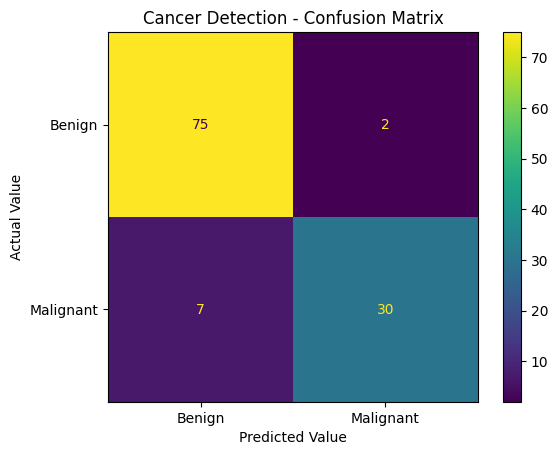

In [62]:
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cmplot.plot()
cmplot.ax_.set(title = 'Cancer Detection - Confusion Matrix',
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [63]:
# creating empty list variable
acc = []

In [64]:
# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and
# storing the accuracy values

for i in range(1, 100, 2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    diff = train_acc - test_acc
    acc.append([diff, train_acc, test_acc])

acc

[[0.02631578947368418, 1.0, 0.9736842105263158],
 [0.021881627144785032, 0.978021978021978, 0.956140350877193],
 [0.026238673607094642, 0.9648351648351648, 0.9385964912280702],
 [0.017447464815885882, 0.9560439560439561, 0.9385964912280702],
 [0.010854058222479201, 0.9494505494505494, 0.9385964912280702],
 [0.037189126662810934, 0.9582417582417583, 0.9210526315789473],
 [0.041584731058415314, 0.9626373626373627, 0.9210526315789473],
 [0.041584731058415314, 0.9626373626373627, 0.9210526315789473],
 [0.045961056487372365, 0.9582417582417583, 0.9122807017543859],
 [0.034991324465008744, 0.9560439560439561, 0.9210526315789473],
 [0.039386928860613124, 0.9604395604395605, 0.9210526315789473],
 [0.039386928860613124, 0.9604395604395605, 0.9210526315789473],
 [0.039386928860613124, 0.9604395604395605, 0.9210526315789473],
 [0.043763254289570175, 0.9560439560439561, 0.9122807017543859],
 [0.061307113938692925, 0.9560439560439561, 0.8947368421052632],
 [0.052535184114131495, 0.9560439560439561,

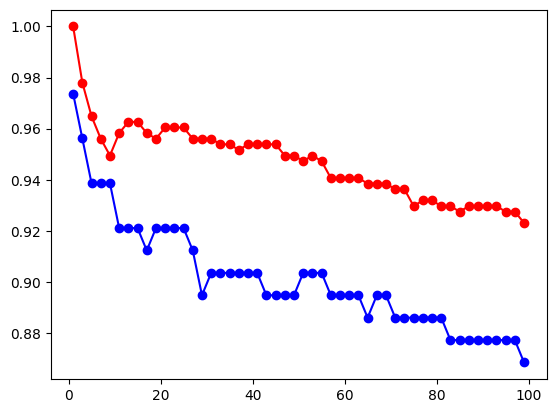

In [65]:
# Plotting the data accuracies
plt.plot(np.arange(1, 100, 2), [i[1] for i in acc], "ro-")
plt.plot(np.arange(1, 100, 2), [i[2] for i in acc], "bo-")

In [67]:
# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV

In [68]:
k_range = list(range(1, 100, 2))
param_grid = dict(n_neighbors = k_range)

In [69]:
# Defining parameter range
grid = GridSearchCV(knn, param_grid, cv = 10,
                    scoring = 'accuracy',
                    return_train_score = False, verbose = 1)

In [70]:
KNN_new = grid.fit(X_train, Y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [71]:
print(KNN_new.best_params_)

{'n_neighbors': 13}


In [72]:
accuracy = KNN_new.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 95.38%


In [73]:
# Predict the class on test data
pred = KNN_new.predict(X_test)
pred

array(['Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
      

In [74]:
cm = skmet.confusion_matrix(Y_test, pred)

[Text(0.5, 1.0, 'Cancer Detection - Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

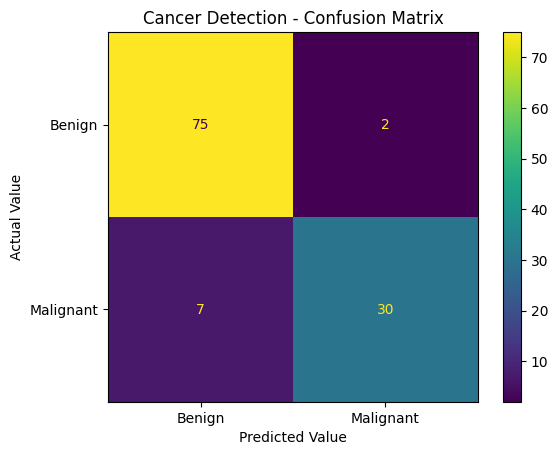

In [75]:
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
cmplot.plot()
cmplot.ax_.set(title = 'Cancer Detection - Confusion Matrix',
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [76]:
knn_best = KNN_new.best_estimator_
